### 1. Four classifier: original, one with only sleep as feature, one only train on sleep class and one only train on awake class.

### 2. For 231 and 222_1, sleep classifier performs better than the awake classifier. 

### 3. For original classifier, the accuracy for sleep class is lower than that for awake class

### 4. Consider stratified both sleep class and label

In [8]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings("ignore")
n_classifier = 7

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
features_list = ['delta', 'beta','low_gamma']
#plot_3d_var_list = ['beta2', 'beta4','low_gamma3']

import pickle
p231, p222_1, p222_2, p229 = \
pickle.load(open(hp.prepath_pat + '231' +'_trained.p', "rb" )),\
pickle.load(open(hp.prepath_pat + '222_1' +'_trained.p', "rb" )), \
pickle.load(open(hp.prepath_pat + '222_2' +'_trained.p', "rb" )), \
pickle.load(open(hp.prepath_pat + '229_trained.p', "rb" ))

## 1. Data loading

### What the data looks like

In [10]:
pat = p229

print('The number of EEG segments that come from long episode is ' + str(pat.features.shape[0] - 47))
print('The number of EEG segments that come from schduled is ' + str(47))
display(pd.DataFrame(pat.features['label'].value_counts()))

The number of EEG segments that come from long episode is 1032
The number of EEG segments that come from schduled is 47


,label
False,673
True,406


In [4]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns',25)
display(pd.DataFrame(pat.features))


,filename,region_start_time,sleep,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,...,high_gamma3,high_gamma4,all1,all2,all3,all4,i12,i34,epoch,label,id,if_stimulated
1633,1.315205e+17,2017-10-09 05:42:50.025600,1.0,696.474474,585.337654,179.407563,692.198432,453.077808,768.757884,164.028258,536.489433,185.505068,...,13.599686,25.202656,1603.706866,4619.270803,743.910832,1968.323736,28.0,16.0,0,True,229,False
1634,1.315205e+17,2017-10-09 05:44:47.011200,1.0,833.779602,651.250164,164.036945,828.162406,568.359164,825.928353,181.207567,656.595252,443.331936,...,13.563658,21.172662,2100.923760,3793.897019,656.189079,1974.650835,34.0,14.0,0,True,229,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,1.317855e+17,2018-08-12 05:51:06.998400,1.0,158.085571,109.737880,106.432058,188.489570,190.259015,149.951025,91.766746,165.944203,81.612447,...,14.778401,26.880796,629.935241,744.607821,340.218908,703.339473,44.0,20.0,43,False,229,False
2711,1.317855e+17,2018-08-12 05:58:01.027200,1.0,136.472400,105.443512,12.278771,121.205274,221.926485,185.830576,40.252771,172.041334,74.739439,...,14.964214,26.004803,611.536622,682.193280,139.358129,639.677343,60.0,38.0,43,False,229,False


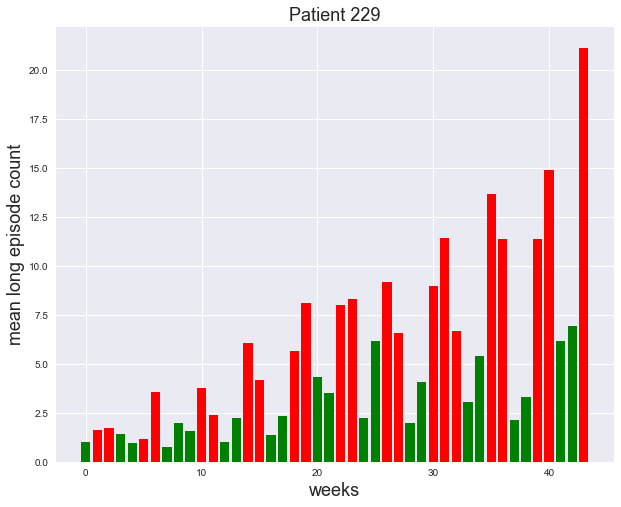

In [11]:
plot_funcs.plot_epoch_mean([p229])


## 2. Building Classifiers
### Fitting 7 classfier to the training data and tune the hyperparameter using 10-fold cross-validation. Evaluate the performance of each classifier using test data

### 1:'Logistic Regression' (regulation type, regulation parameter)
### 2: 'SVM' (kernel type, degreee, regulation type, regulation parameter)
### 3: 'Gaussian Naive Bayes classifier'
### 4:'Linear Discriminant Analysis'
### 5:'Decision Tree' (criterion for splliting, max depth, min sample per leaf)
### 6:'Random Forest' (criterion for splliting, number of trees, number of features used in each  tree, max depth, min sample per leaf)
### 7:'Gradient Boosting' (number of estimator, number of samples used in each estimator, max depth, min sample per leaf, learning rate)

## 3. Classifier Performance

### Performace Overview of each Classifier

### The confusion matrix and ROC of Logistic Regression (the best classifier in this case)

Confusion matrix, without normalization


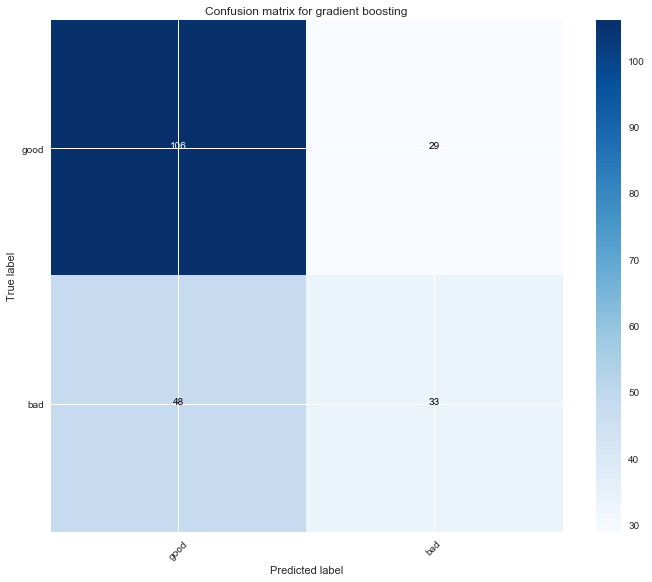

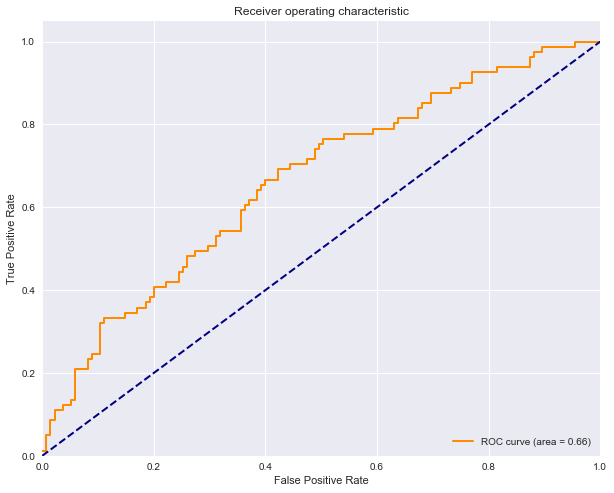

In [6]:


X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_scaler = 1, if_remove_icd = 1, if_remove_sleep = 1)
JJ.estimator_performance(7, X_test, y_test, pat = pat, if_plot_c = 1, if_plot_roc = 1)

### ROC curve for all classifiers

FileNotFoundError: [Errno 2] No such file or directory: '../fig/sleep/229.png'

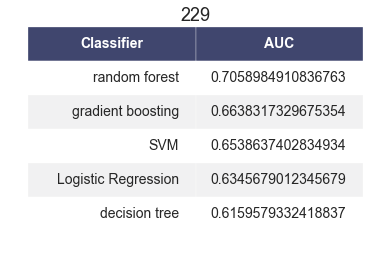

In [7]:
JJ.scores_estimators(X_test, y_test, pat = pat, label='229')

In [ ]:
plot_funcs.plot_roc_all(X_test, y_test, pat =pat)

### Ensemble SVM, Logistic Regression, Random Forest and Gradient Boosting using hard vote

In [ ]:

X_train, X_test, y_train, y_test = JJ.get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)
#parameter_tuning(X_train, X_test, y_train, y_test, classifier = 1, C_range_num = 100, if_save = 1)

print("The accuracy for ensemble model is")
JJ.ensemble_model(X_train, y_train, X_test, y_test, patid = patid,if_save = 0)

## 4. Feature Importance

### Feature Importance for Logistic regression

In [ ]:
plot_funcs.feature_importance(pat,1)

### Feature Importance for Gradient Boosting

In [ ]:
plot_funcs.feature_importance(pat,7)

## 5. Data visualization

## Pairwise features scatter plot

### Each data point corresponds to a .dat file. Red points means it is in a good epoch, and blue points means it is in a bad epoch.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_ml = JJ.get_scatter_plot_data(data, patid)
sns.set(font_scale=2)
colors = ["baby pink", "neon blue", "bright red", "sky"]
g = sns.pairplot(data_ml, hue="label_sti", size = 6, vars=JJ.get_variable_name(features_list), plot_kws={"s": 5},palette=sns.xkcd_palette(colors))
plt.show()

### 3D scatter plot

In [ ]:
%matplotlib notebook
sns.set(font_scale=1)

JJ.scatter_plot_3d(data,patid, var_list = plot_3d_var_list)
